In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('airline_passenger_satisfaction.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

In [3]:
df.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied


In [4]:
from sklearn.model_selection import train_test_split as tts 

In [5]:
replace_dict = {"Satisfied": 1, 'Neutral or Dissatisfied': 0}

In [6]:
df_copy = df.copy()
df_copy['Satisfaction'] = df_copy['Satisfaction'].replace(replace_dict) 

/var/folders/0p/3b6s1cyd2glf9kj66m2vt2gm0000gn/T/ipykernel_2030/2946990702.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_copy['Satisfaction'] = df_copy['Satisfaction'].replace(replace_dict)


In [7]:
df_copy.head(20)

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,0
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,1
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,1
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,1
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,1
5,6,Male,43,Returning,Business,Business,3788,0,0.0,4,...,4,4,4,3,3,4,4,4,4,1
6,7,Male,43,Returning,Business,Business,1963,0,0.0,3,...,5,5,5,4,5,5,3,5,5,1
7,8,Female,60,Returning,Business,Business,853,0,3.0,3,...,3,4,4,4,4,3,4,3,3,1
8,9,Male,50,Returning,Business,Business,2607,0,0.0,1,...,4,3,4,3,3,4,4,4,4,0
9,10,Female,38,Returning,Business,Business,2822,13,0.0,2,...,5,4,5,4,2,5,2,5,5,1


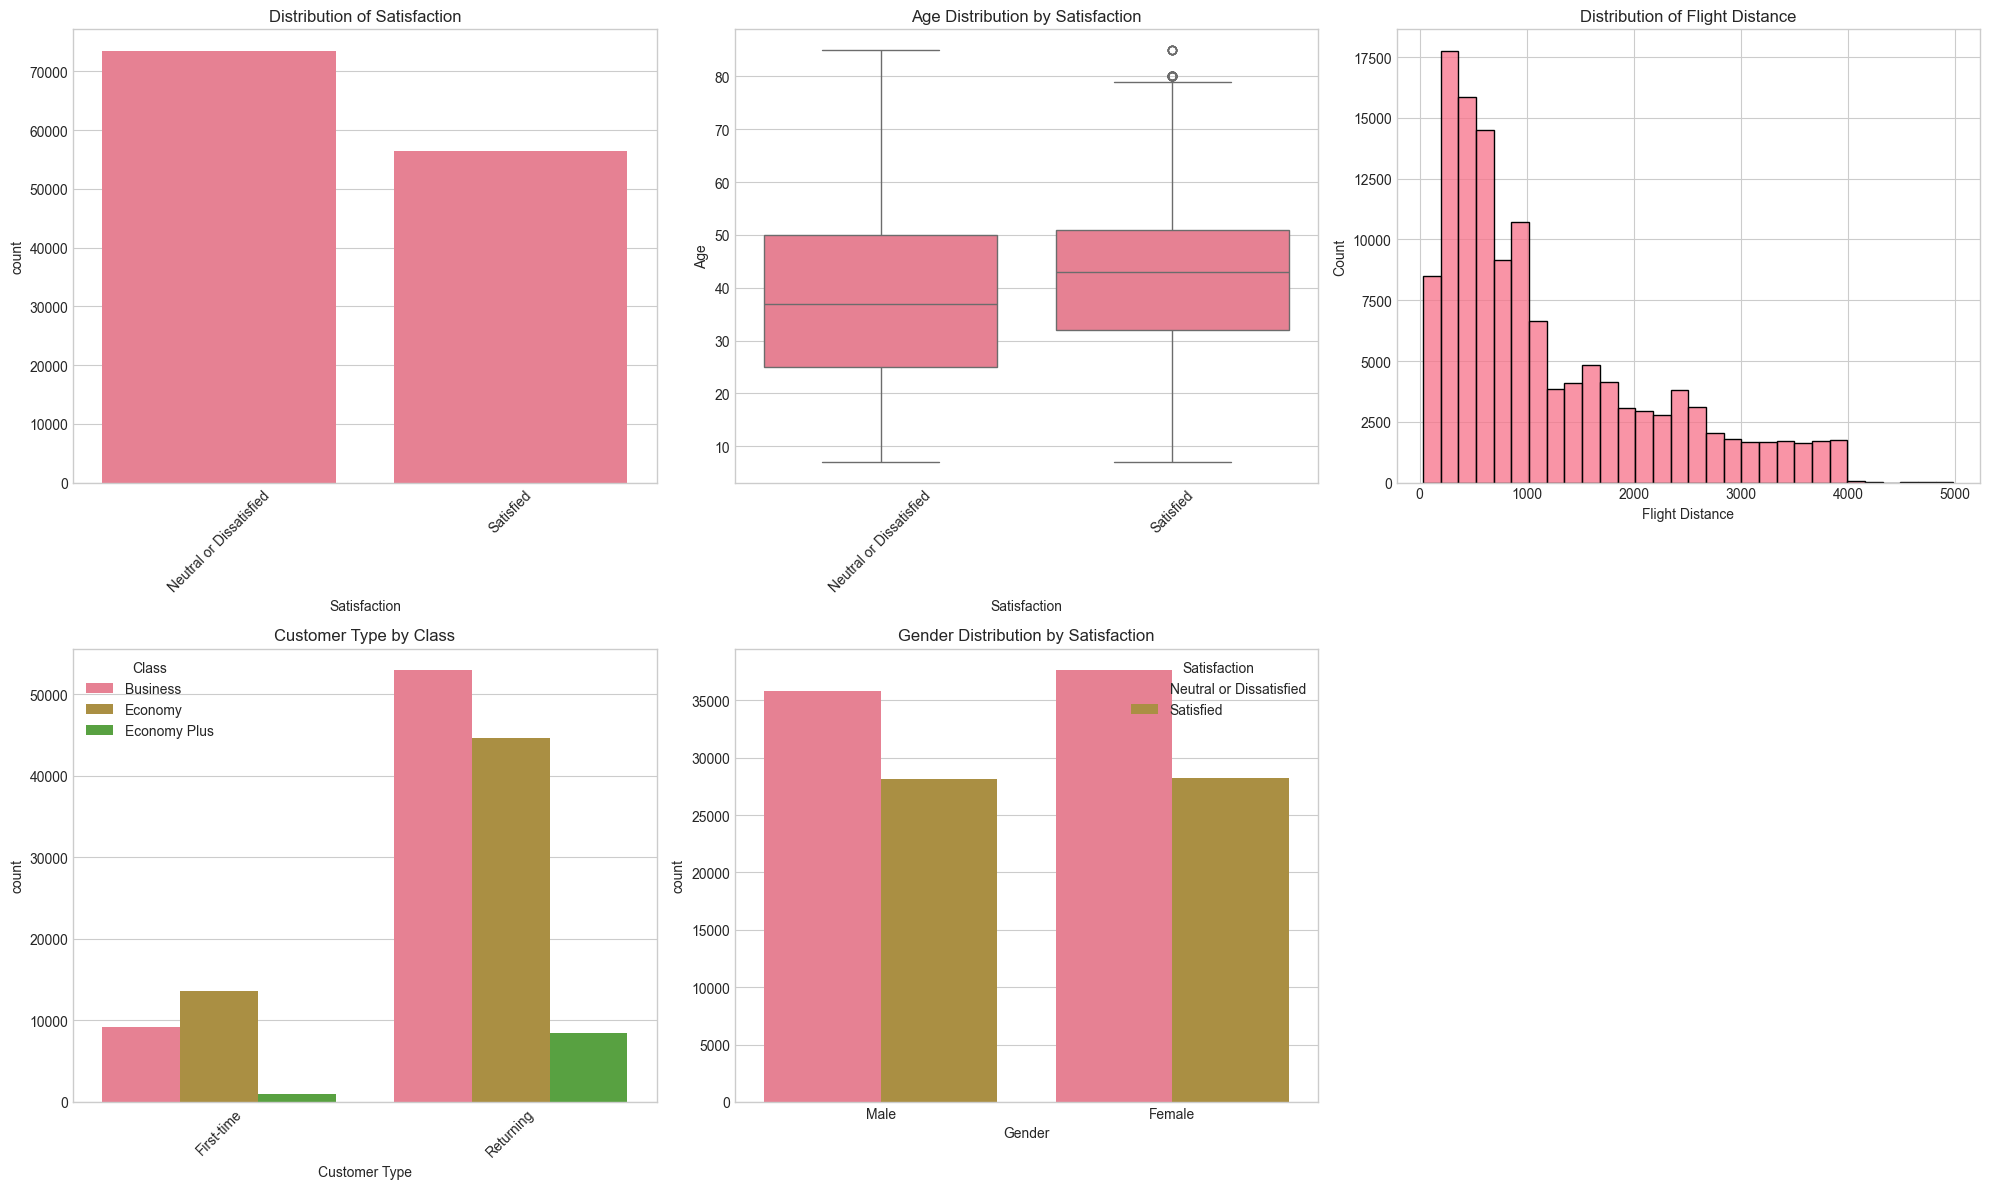

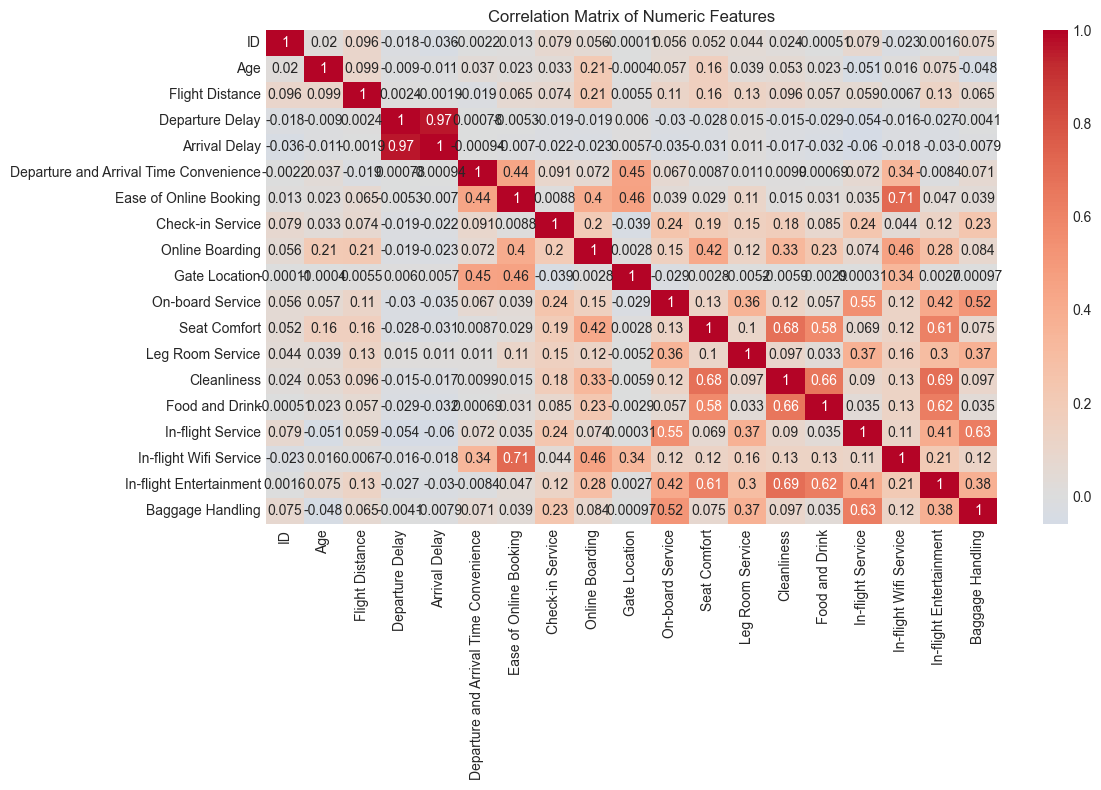


Basic Statistics:
                  ID            Age  Flight Distance  Departure Delay  \
count  129880.000000  129880.000000    129880.000000    129880.000000   
mean    64940.500000      39.427957      1190.316392        14.713713   
std     37493.270818      15.119360       997.452477        38.071126   
min         1.000000       7.000000        31.000000         0.000000   
25%     32470.750000      27.000000       414.000000         0.000000   
50%     64940.500000      40.000000       844.000000         0.000000   
75%     97410.250000      51.000000      1744.000000        12.000000   
max    129880.000000      85.000000      4983.000000      1592.000000   

       Arrival Delay  Departure and Arrival Time Convenience  \
count  129487.000000                           129880.000000   
mean       15.091129                                3.057599   
std        38.465650                                1.526741   
min         0.000000                                0.000000   
25%

In [9]:
# Set up the style
plt.style.use("seaborn-v0_8-whitegrid")
sns.set_palette("husl")

# Create a figure with subplots for multiple visualizations
plt.figure(figsize=(20, 12))

# 1. Check class distribution (target variable)
plt.subplot(2, 3, 1)
sns.countplot(data=df, x='Satisfaction')
plt.title('Distribution of Satisfaction')
plt.xticks(rotation=45)

# 2. Age distribution by satisfaction
plt.subplot(2, 3, 2)
sns.boxplot(data=df, x='Satisfaction', y='Age')
plt.title('Age Distribution by Satisfaction')
plt.xticks(rotation=45)

# 3. Flight Distance distribution
plt.subplot(2, 3, 3)
sns.histplot(data=df, x='Flight Distance', bins=30)
plt.title('Distribution of Flight Distance')

# 4. Customer Type and Class breakdown
plt.subplot(2, 3, 4)
sns.countplot(data=df, x='Customer Type', hue='Class')
plt.title('Customer Type by Class')
plt.xticks(rotation=45)

# 5. Gender distribution by satisfaction
plt.subplot(2, 3, 5)
sns.countplot(data=df, x='Gender', hue='Satisfaction')
plt.title('Gender Distribution by Satisfaction')

plt.tight_layout()
plt.show()

# Correlation analysis for numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(12, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numeric Features')
plt.tight_layout()
plt.show()

# Basic statistics
print("\nBasic Statistics:")
print(df.describe())

# Missing values check
print("\nMissing Values:")
print(df.isnull().sum())

# Unique values in categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
print("\nUnique Values in Categorical Columns:")
for col in categorical_cols:
    print(f"\n{col}:")
    print(df[col].value_counts())

In [ ]:
# 1. Data Quality & Structure
print("=== Data Quality & Structure ===")
print(f"Shape: {df.shape}")
print("\nInfo:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())

# 2. Basic Statistics
print("\n=== Basic Statistics ===")
print(df.describe())

# 3. Categorical Analysis
categorical_cols = df.select_dtypes(include=['object']).columns
print("\n=== Categorical Variables ===")
for col in categorical_cols:
    print(f"\n{col} value counts:")
    print(df[col].value_counts(normalize=True))

# 4. Numerical Analysis
numerical_cols = df.select_dtypes(include=[np.number]).columns

# 5. Correlation Analysis
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# 6. Skewness Analysis
print("\n=== Skewness Analysis ===")
print(df[numerical_cols].skew())

In [5]:
X, X_test, y_train, y_test = tts(df.drop(['ID', 'Satisfaction'], axis = 1), df['Satisfaction'])

In [6]:
y_train

5007      Neutral or Dissatisfied
97614                   Satisfied
66304                   Satisfied
114013    Neutral or Dissatisfied
4750                    Satisfied
                   ...           
92841     Neutral or Dissatisfied
75581     Neutral or Dissatisfied
55277     Neutral or Dissatisfied
96876     Neutral or Dissatisfied
126457    Neutral or Dissatisfied
Name: Satisfaction, Length: 97410, dtype: object

In [7]:
y_train.unique()

array(['Neutral or Dissatisfied', 'Satisfied'], dtype=object)

In [8]:
replace_dict = {"Satisfied": 1, "Neutal or Dissastified": 0}